 # C02 emissions from different heating technology - Plot
------------------------------------------------------------------------------------------------


## Read me

This notebook creates a basis for plotting C02 emissions from the kbob that can be modified based on current needs.

The input is the useful energy consumed in the study area by different technology for all scenarios in kWh. The data can contained in a csv or a excel file. In both cases, the data forms a tabular with the following columns: scenario, year, technology 1, technology 2, technology 3...  The technology are the technology available in the kbob.

Name must be given in english. Fuzzy matching is used to find the selected technology.

### Example Data (in kWh)

| Scenario | Year  | Boiler Oil  | Boiler Gas   | Air-Water Heat pump  |
|------|------|------|------|------|
|   BAU | 2000| 1345| 1345|0|
|   BAU | 2025| 1545| 1545|0|
|   BAU | 2000| 1645| 1645|0|
|  sce 1 | 2000| 0| 1345|1345|
|  sce 1| 2025| 0| 1545|1545|
|  sce 1 | 2000|0| 1645|1645|
|  sce 2 | 2000| 1000| 1045|645|
|  sce 2| 2025| 1000| 1345|745|
|  sce 2 | 2000|1000| 1445|845|



## Load the necessary modules

In [1]:
import pandas as pd
import numpy as np
import os
import sys

# when git repository public
# !pip install git+..

# actuellement
mydir = r'W:\Enerapi\code\OSEF'
if mydir not in sys.path:
    sys.path.append(mydir)
from osef.plot import plot_kpi
from osef.access_data import kbob

## List of available technologies

In [2]:
mykbob = kbob.Kbob()
print(mykbob.get_available_technologies(language="ENG", ener_type='useful'))

['Boiler oil EL', 'Boiler gas', 'Boiler propane / butane', 'Boiler coal coke', 'Boiler coal briquette', 'Boiler firewood', 'Boiler firewood with particle filter', 'Boiler wood chips', 'Boiler wood chips with particle filter', 'Boiler pellets', 'Boiler pellets with particle filter', 'Boiler biogas', 'Electric air-water heat pump (COPA 2.8)', 'Electric Heat Pump Geothermal Probes (COPA 3.9)', 'Groundwater Electric Heat Pump (COPA 3.4)', 'Flat solar collectors - hot water individual house', 'Flat solar collectors - heat and hot water - individual house', 'Solar collectors plan - hot water rental building', 'Solar collectors with tubes - heat and hot water - individual house', 'Cogeneration (CHP) plant - small - gas', 'Cogeneration (CHP) plant - small gas']


## Input

In [6]:

# name of the file and plot (with the correct path!)
filename = 'data_example/kpi_example_c02.xlsx'
plot_filename = 'my_plot.png'

## Load data

In [8]:
print()
# load excel or csv
if 'xls' in os.path.splitext(filename)[1]:
    data = pd.read_excel(filename)
else:
    data = pd.read_csv(filename)
    

## Options for the plot
List of available colors for the plot: https://matplotlib.org/examples/color/named_colors.html

In [9]:
width = 0.22
fontsize = 10
color = ['rosybrown', 'firebrick', 'darksalmon']
title_name = 'CO$_{2}$ emission'
xlabel = 'Time [years]'

## Do the plot and save it

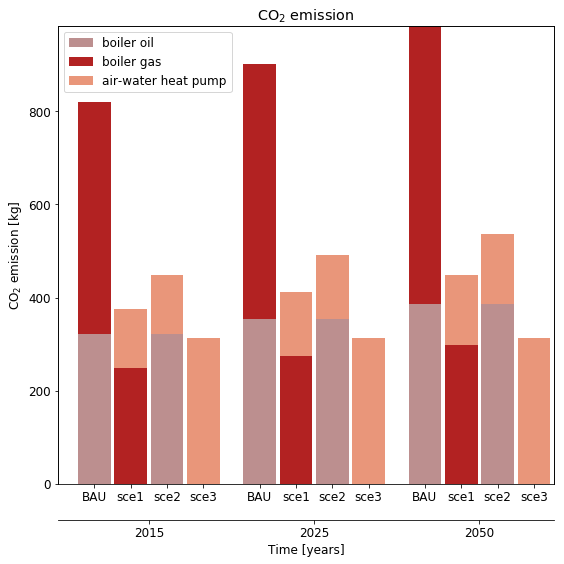

In [11]:
plot_kpi.plot_c02(data, plot_filename, title_name=title_name, xlabel=xlabel, width=width, show=True, color=color)